<a href="https://colab.research.google.com/github/LucasFerrSil/Fenomenos-Termicos/blob/main/FETERM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MMQ

#Incerteza do Y:

def somav(v):
  soma = 0
  for i in range(len(v)):
      valor = 1/((v[i][1])**2)
      soma += valor
  return soma

def somax(x,y,valor):
  soma = 0
  for i in range(len(x)):
      termo = x[i][0]/((y[i][1])**2)
      soma += termo
  soma = soma/valor
  return soma

def sox2(x,y,valor):
  soma = 0
  for i in range(len(x)):
      termo = ((x[i][0])**2)/((y[i][1])**2)
      soma += termo
  soma = soma/valor
  return soma

def somay(x,y,valor):
  soma = 0
  for i in range(len(y)):
      termo = (y[i][0])/((y[i][1])**2)
      soma += termo
  soma = soma/valor
  return soma

def somaxy(x,y,valor):
  soma = 0
  for i in range(len(x)):
      termo = (x[i][0])*(y[i][0])/(y[i][1])**2
      soma += termo
  soma = soma/valor
  return soma

def a(somax,somay,somaxy,somax2,valor):
  a = ((somax*somay) - somaxy)/((somax**2) - somax2)
  t = abs(1/(valor*((somax2) - (somax**2))))
  x = [a,t**(1/2)]
  return x

def b(somay,a,somax,somax2,valor):
  b = somay - a[0]*somax
  t = abs((somax2/valor)/((somax2) - (somax**2)))
  x = [b,t**(1/2)]
  return x

In [ ]:
def desviopadrao(vetor):
    soma = 0
    c = len(vetor)
    for i in range(c):
        soma += vetor[i][0]
    media = soma/c
    soma_dos_quadrados = 0
    for i in range(c):
        soma_dos_quadrados += (vetor[i][0] - media)**2
    desvio = (soma_dos_quadrados/(c*(c - 1)))**(1/2)
    x = [media,desvio]
    return x

def media(vetor):
    soma = 0
    for i in range(len(vetor)):
        soma += vetor[i][0]
    media = soma/len(vetor)
    soma = 0
    for i in range(len(vetor)):
        soma += (vetor[i][1]**2)
    incertezamedia = (soma**(1/2))/len(vetor)
    x = [media,incertezamedia]
    return x

def elevar(v,p):
  a = []
  for i in range(len(v)):
    valor = (v[i][0])**p
    incv = abs(p*(v[i][0]**(p-1))*v[i][1])
    x = [valor,incv]
    a.append(x)
  return a

def logaritmo(v,v0):
  import numpy as np
  a = []
  for i in range(len(v)):
    x = []
    valor = np.log((v[i][0])/v0[0])
    x.append(valor)
    incln = abs(v[i][1]/v[i][0])
    x.append(incln)
    a.append(x)
  return a

In [ ]:
t0 = [23,0.5]
r0 = [5.7,0.1]
t = [[65,0.5],[60,0.5],[55,0.5],[50,0.5],[45,0.5],[40,0.5],[35,0.5],[30,0.5],[25,0.5],[20,0.5]]
r = [[1.27,0.02],[1.44,0.02],[1.75,0.02],[2.16,0.03],[2.54,0.03],[2.96,0.04],[3.62,0.05],[4.18,0.09],[5.2,0.1],[6.3,0.1]]

for i in range(len(t)):
  t[i][0] += 273
print(t)
print(r)
t = elevar(t,-1)
r = logaritmo(r,r0)
print(t)
print(r)

[[338, 0.5], [333, 0.5], [328, 0.5], [323, 0.5], [318, 0.5], [313, 0.5], [308, 0.5], [303, 0.5], [298, 0.5], [293, 0.5]]
[[1.27, 0.02], [1.44, 0.02], [1.75, 0.02], [2.16, 0.03], [2.54, 0.03], [2.96, 0.04], [3.62, 0.05], [4.18, 0.09], [5.2, 0.1], [6.3, 0.1]]
[[0.0029585798816568047, 4.3765974580721965e-06], [0.003003003003003003, 4.509013518022527e-06], [0.003048780487804878, 4.647531231409875e-06], [0.0030959752321981426, 4.792531319192171e-06], [0.0031446540880503146, 4.944424666745778e-06], [0.003194888178913738, 5.103655237881371e-06], [0.003246753246753247, 5.2707033226513745e-06], [0.0033003300330033004, 5.446089163371783e-06], [0.003355704697986577, 5.630377010044593e-06], [0.0034129692832764505, 5.824179664294284e-06]]
[[-1.5014492743700045, 0.015748031496062992], [-1.3758230612525952, 0.01388888888888889], [-1.1808503869050817, 0.011428571428571429], [-0.9703579531444309, 0.013888888888888888], [-0.8083020938100592, 0.011811023622047244], [-0.6552769065045355, 0.013513513513513

In [ ]:
valor = somav(t)
somax = somax(r,t,valor)
somax2 = sox2(r,t,valor)
somay = somay(r,t,valor)
somaxy = somaxy(r,t,valor)
a = a(somax,somay,somaxy,somax2,valor)
b = b(somay,a,somax,somax2,valor)

print (a)
print (b)


[0.0002809442456694949, 3.119435036379213e-06]
[0.0033796958388264894, 2.9986197853928103e-06]


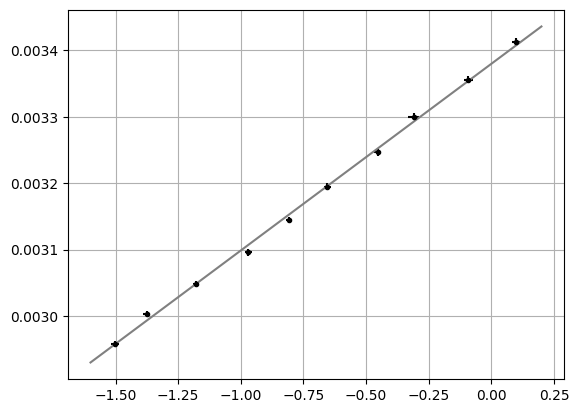

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
for i in range(len(r)):
  plt.errorbar(r[i][0],t[i][0],yerr=t[i][1],xerr=r[i][1],fmt="k.")
plt.grid()

x = np.linspace(-1.6,0.2)
y = a[0]*x+b[0]
plt.plot(x,y,'gray')